In [61]:
#List of dependencies - Use as needed
                #Refer to week 6 notes
# import requests                 # Used for APIs
from config import api_key      # file with API key
# import time                     # Used for APIs to expand time between each hit
# import json                     # Used for APIs
# import pprint                   # Formatting for JSON files

        #Refer to week 5 notes
#%matplotlib widget - Allows for multiple instances of same plot
import matplotlib.pyplot as plt # Create plots
import numpy as np # mathematical manipulations
from scipy import stats as st #- stats and probability

        #Refer to week 4 notes
from pathlib import Path # Link to csv-files
import pandas as pd # Read csv files
import os

Setting up temperature and rainfall graphs

In [64]:
#Dubbo Temp

csvpath = os.path.join('.','Resources', 'Dubbo_NSW_BOM', 'Dubbo_Anuual_Mean_Max_Temp.csv')
df_1 = pd.read_csv(csvpath)
df_1= df_1[['Year','Annual']]

#Dubbo Rain
csvpath = os.path.join('.','Resources', 'Dubbo_NSW_BOM', 'Dubbo_Annual_Rainfall.csv')
df_2 = pd.read_csv(csvpath)
df_2 = df_2[['Year','Annual']]

#Cairns Temp
csvpath = os.path.join('.','Resources', 'Cairns_QL_BOM', 'Cairns_Annual_Mean_Max_Temp.csv')
df_3= pd.read_csv(csvpath)
df_3= df_3[['Year','Annual']]

#Cairns Rain
csvpath = os.path.join('.','Resources', 'Cairns_QL_BOM', 'Cairns_Annual_Rainfall.csv')
df_4 = pd.read_csv(csvpath)
df_4 = df_4[['Year','Annual']]

#Wangaratta Temp
csvpath = os.path.join('.','Resources', 'Wangaratta_VIC_BOM', 'Wangaratta_Annual_Mean_Max_Temp.csv')
df_5= pd.read_csv(csvpath)
df_5 = df_5[['Year','Annual']]

#Wangaratta Rain
csvpath = os.path.join('.','Resources', 'Wangaratta_VIC_BOM', 'Wangaratta_Annual_Rain.csv')
df_6 = pd.read_csv(csvpath)
df_6= df_6[['Year','Annual']]

#Coffin Bay SA Temp Note: Wanilla closest location found
csvpath = os.path.join('.','Resources', 'CoffinBay_SA_BOM', 'Wanilla_Annual_Mean_Max_Temp.csv')
df_7 = pd.read_csv(csvpath)
df_7 = df_7[['Year','Annual']]

#Coffin Bay SA Rain Note: Wanilla closest location found
csvpath = os.path.join('.','Resources', 'CoffinBay_SA_BOM', 'Wanilla_Annual_Rainfall.csv')
df_8 = pd.read_csv(csvpath)
df_8 = df_8[['Year','Annual']]

#Northam WA Temp
csvpath = os.path.join('.','Resources', 'Northam_WA_BOM', 'Northam_Annual_Mean_Max_Temp.csv')
df_9 = pd.read_csv(csvpath)
df_9 = df_9[['Year','Annual']]

#Northam WA Rain
csvpath = os.path.join('.','Resources', 'Northam_WA_BOM', 'Northam_Annual_Rainfall.csv')
df_10 = pd.read_csv(csvpath)
df_10 = df_10[['Year','Annual']]



Merging Temp and Rainfall CSVs

In [83]:
Initial_merge = pd.merge(df_1, df_2, how="left", on=['Year'])
Initial_merge = Initial_merge.rename(columns= {"Annual_x":"NSW Annual Max Mean Temp",
                                                "Annual_y":"NSW Annual Rainfall"})

Second_merge = pd.merge(Initial_merge, df_3, how="left", on=['Year'])
Second_merge = Second_merge.rename(columns= {"Annual":"QL Annual Max Mean Temp"})

Third_merge = pd.merge(Second_merge, df_4, how="left", on=['Year'])
Third_merge = Third_merge.rename(columns= {"Annual":"QL Annual Rainfall"})

Fourth_merge = pd.merge(Third_merge, df_5, how="left", on=['Year'])
Fourth_merge = Fourth_merge.rename(columns= {"Annual":"VIC Annual Max Mean Temp"})

Fifth_merge = pd.merge(Fourth_merge, df_6, how="left", on=['Year'])
Fifth_merge = Fifth_merge.rename(columns= {"Annual":"VIC Annual Rainfall"})

Sixth_merge = pd.merge(Fifth_merge, df_7, how="left", on=['Year'])
Sixth_merge = Sixth_merge.rename(columns= {"Annual":"SA Annual Max Mean Temp"})

Seventh_merge = pd.merge(Sixth_merge, df_8, how="left", on=['Year'])
Seventh_merge = Seventh_merge.rename(columns= {"Annual":"SA Annual Rainfall"})

Eight_merge = pd.merge(Seventh_merge, df_9, how="left", on=['Year'])
Eight_merge = Eight_merge.rename(columns= {"Annual":"WA Annual Max Mean Temp"})

Temp_Rain_df = pd.merge(Eight_merge, df_10, how="left", on=['Year'])
Temp_Rain_df= Temp_Rain_df.rename(columns= {"Annual":"WA Annual Rainfall"})
Temp_Rain_df.head()


,Year,NSW Annual Max Mean Temp,NSW Annual Rainfall,QL Annual Max Mean Temp,QL Annual Rainfall,VIC Annual Max Mean Temp,VIC Annual Rainfall,SA Annual Max Mean Temp,SA Annual Rainfall,WA Annual Max Mean Temp,WA Annual Rainfall
0,1993,23.4,NaN,NaN,NaN,21.1,856.8,21.9,NaN,25.4,320.9
1,1994,24.3,NaN,NaN,NaN,21.8,485.5,21.8,NaN,27.0,282.2
2,1995,23.6,NaN,NaN,NaN,20.7,824.9,20.3,379.8,25.6,554.4
3,1996,23.3,NaN,NaN,NaN,20.6,781.1,20.3,364.0,25.6,478.1
4,1997,25.0,NaN,NaN,NaN,22.8,385.0,20.6,349.2,25.4,394.6


In [84]:
#Fill in NA values close to max year (Average of 2 prior years) **Note- AI assisted
df_filled = Temp_Rain_df.fillna((Temp_Rain_df.shift() + Temp_Rain_df.shift(-1)) / 2)
rolling_mean = df_filled.rolling(3, min_periods=1).mean().shift(2)
filled_df = df_filled.fillna(rolling_mean.round())
filled_df.head()

,Year,NSW Annual Max Mean Temp,NSW Annual Rainfall,QL Annual Max Mean Temp,QL Annual Rainfall,VIC Annual Max Mean Temp,VIC Annual Rainfall,SA Annual Max Mean Temp,SA Annual Rainfall,WA Annual Max Mean Temp,WA Annual Rainfall
0,1993,23.4,NaN,NaN,NaN,21.1,856.8,21.9,NaN,25.4,320.9
1,1994,24.3,NaN,NaN,NaN,21.8,485.5,21.8,NaN,27.0,282.2
2,1995,23.6,NaN,NaN,NaN,20.7,824.9,20.3,379.8,25.6,554.4
3,1996,23.3,NaN,NaN,NaN,20.6,781.1,20.3,364.0,25.6,478.1
4,1997,25.0,NaN,NaN,NaN,22.8,385.0,20.6,349.2,25.4,394.6


In [85]:
#Creating rainfall specific DataFrame (usable from 2014 onwards)
rainfall_df = filled_df[['Year', 'NSW Annual Rainfall', 'QL Annual Rainfall', 'VIC Annual Rainfall', 'SA Annual Rainfall', 'WA Annual Rainfall']]
rainfall_df.head()

,Year,NSW Annual Rainfall,QL Annual Rainfall,VIC Annual Rainfall,SA Annual Rainfall,WA Annual Rainfall
0,1993,NaN,NaN,856.8,NaN,320.9
1,1994,NaN,NaN,485.5,NaN,282.2
2,1995,NaN,NaN,824.9,379.8,554.4
3,1996,NaN,NaN,781.1,364.0,478.1
4,1997,NaN,NaN,385.0,349.2,394.6


## State By State wheat production graphs

The following code produces graphs based on each state

In [6]:
# Reading the Wheat_StateByState.csv file
state_df = pd.read_csv("Resources/Wheat_StateByState_formatted.csv")
print(state_df)
year_range = np.arange(1.0,8.0,1.0)
print(year_range)

      Year  NSW_ha   NSW_kt  VIC_ha  VIC_kt  QLD_ha  QLD_kt   SA_ha   SA_kt  \
0  2017-18  2793.5   4702.8  1446.8  3682.1   639.2   765.4  1975.8  4052.0   
1  2018-19  2382.0   1850.3  1402.9  2276.6   419.7   419.7  1820.8  3024.5   
2  2019-20  2132.0   1772.4  1428.9  3714.3   441.5   418.5  1720.9  2689.1   
3  2020-21  4037.0  12972.2  1413.4  4525.0   966.1  1594.2  1831.0  3982.2   
4  2021-22  3607.7  12029.4  1444.6  4246.4   940.6  2222.4  2008.1  4750.1   
5  2022-23  3600.0  10620.0  1500.0  5392.9   980.0  2600.0  2200.0  7350.0   
6  2023-24  3300.0   6600.0  1540.4  4618.9   800.0  1100.0  2200.0  4900.0   

    WA_ha    WA_kt  TAS_ha  TAS_kt  
0  4056.6   7698.6     7.4    40.3  
1  4369.2   9979.2     7.6    40.1  
2  4132.7   5842.2     7.2    43.8  
3  4387.5   8792.7     8.2    56.3  
4  4718.0  12919.1     9.3    70.0  
5  4750.0  14500.0    15.0    82.5  
6  4650.0   8150.0    12.0    85.0  
[1. 2. 3. 4. 5. 6. 7.]


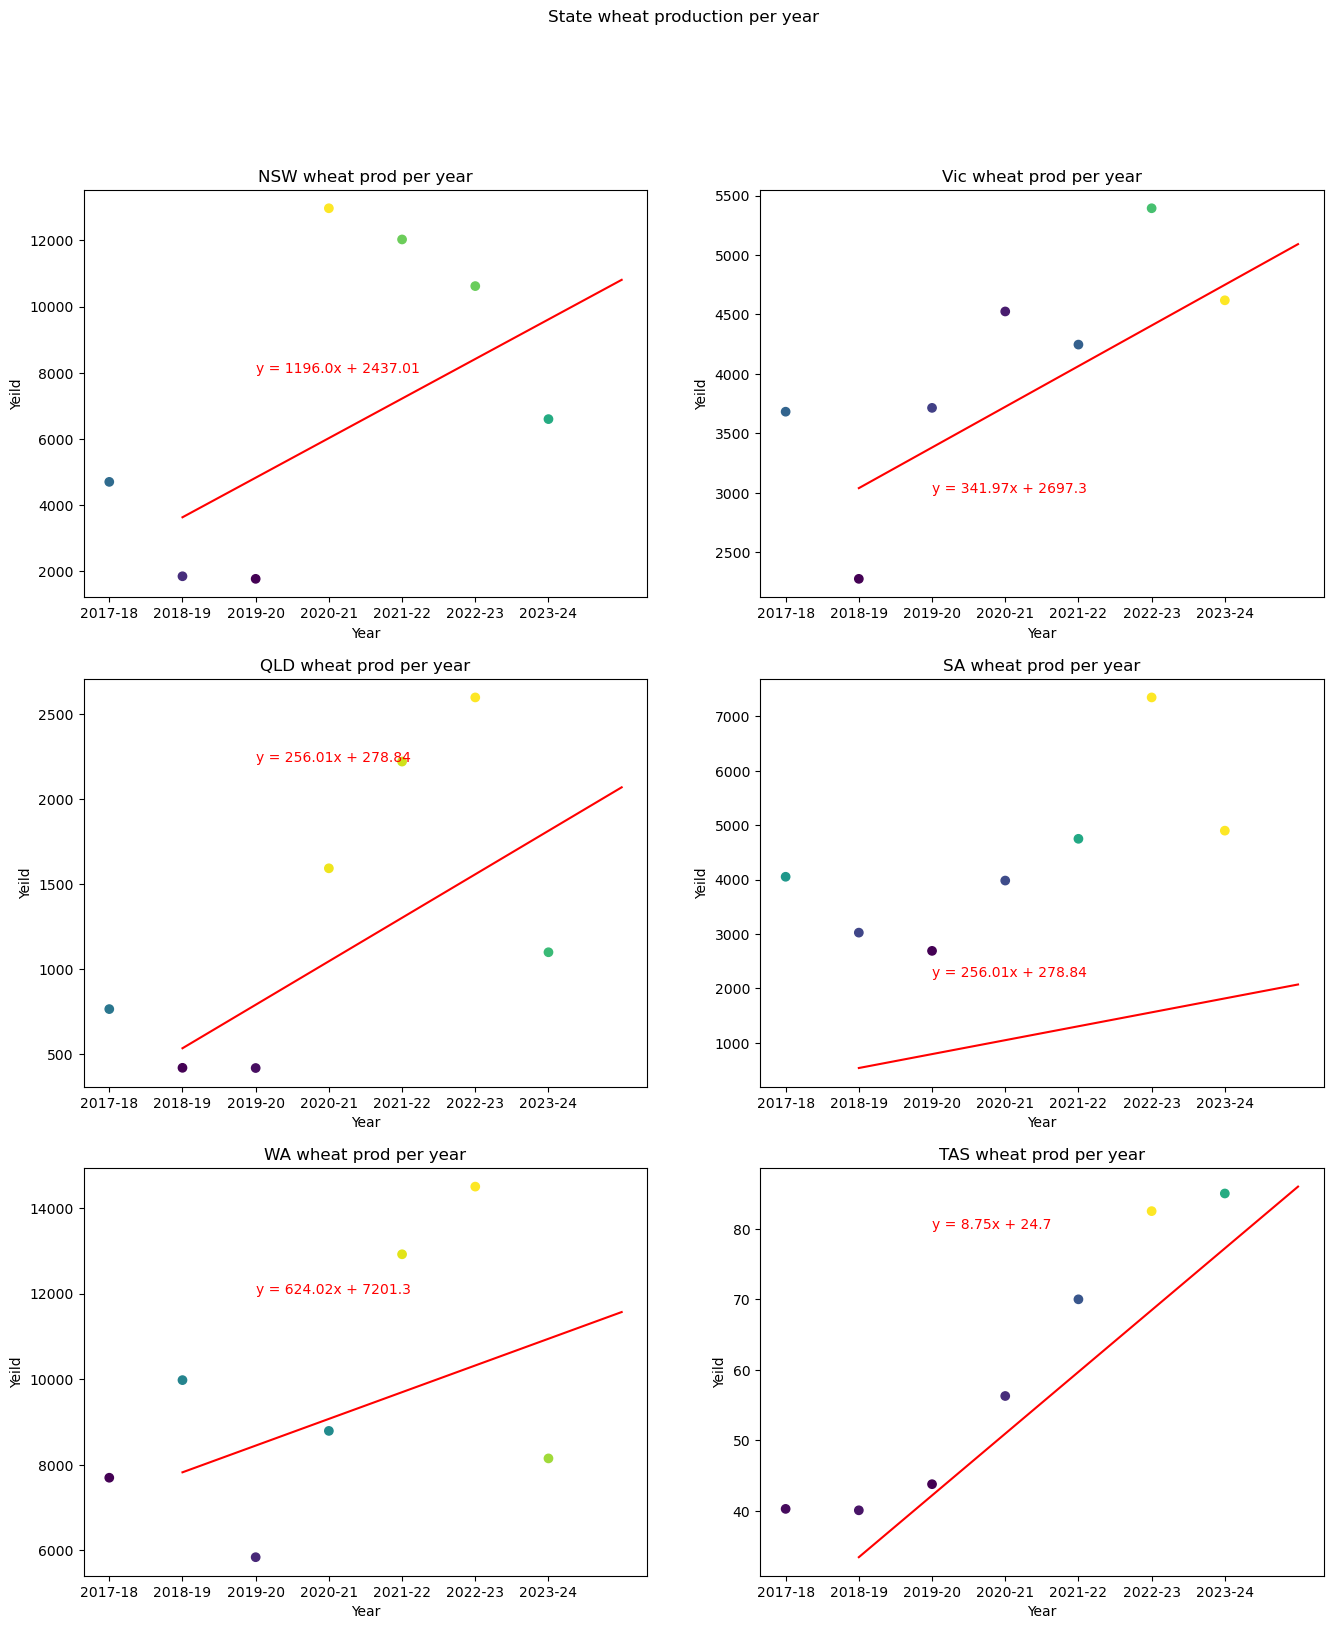

In [7]:
# Creating a multi plot with three rows and two columns
fig, axs = plt.subplots(3, 2)
fig.suptitle('State wheat production per year')
fig.set_figheight(18)
fig.set_figwidth(16)

# NSW graph
# Creating a scatter graph with the year as the x value and yield as the y value
axs[0,0].scatter(state_df['Year'], state_df['NSW_kt'], c=state_df['NSW_ha'], cmap="viridis")
axs[0,0].set_title('NSW wheat prod per year')
axs[0,0].set_ylabel('Yeild')
axs[0,0].set_xlabel('Year')

# NSW linear regression
nsw_x_values = year_range
nsw_y_values = state_df['NSW_kt'].to_numpy()
(nsw_slope, nsw_intercept, nsw_rvalue, nsw_pvalue, nsw_stderr) = st.linregress(nsw_x_values, nsw_y_values)
nsw_regress = year_range * nsw_slope + nsw_intercept
axs[0,0].annotate(f"y = {round(nsw_slope,2)}x + {round(nsw_intercept,2)}", xy=(2,8000), xycoords='data', color='red')
axs[0,0].plot(year_range,nsw_regress,"r-")

# VIC graph
axs[0,1].scatter(state_df['Year'], state_df['VIC_kt'], c=state_df['VIC_ha'], cmap="viridis")
axs[0,1].set_title('Vic wheat prod per year')
axs[0,1].set_ylabel('Yeild')
axs[0,1].set_xlabel('Year')

# VIC linear regression
vic_x_values = year_range
vic_y_values = state_df['VIC_kt'].to_numpy()
(vic_slope, vic_intercept, vic_rvalue, vic_pvalue, vic_stderr) = st.linregress(vic_x_values, vic_y_values)
vic_regress = year_range * vic_slope + vic_intercept
axs[0,1].annotate(f"y = {round(vic_slope,2)}x + {round(vic_intercept,2)}", xy=(2,3000), xycoords='data', color='red')
axs[0,1].plot(year_range,vic_regress,"r-")

# QLD graph
axs[1,0].scatter(state_df['Year'], state_df['QLD_kt'], c=state_df['QLD_ha'], cmap="viridis")
axs[1,0].set_title('QLD wheat prod per year')
axs[1,0].set_ylabel('Yeild')
axs[1,0].set_xlabel('Year')

# QLD linear regression (uncomment the section below once fixed)
qld_x_values = year_range
qld_y_values = state_df['QLD_kt'].to_numpy()
(qld_slope, qld_intercept, qld_rvalue, qld_pvalue, qld_stderr) = st.linregress(qld_x_values, qld_y_values)
qld_regress = year_range * qld_slope + qld_intercept
axs[1,0].annotate(f"y = {round(qld_slope,2)}x + {round(qld_intercept,2)}", xy=(2,2222), xycoords='data', color='red')
axs[1,0].plot(year_range,qld_regress,"r-")

# SA graph
axs[1,1].scatter(state_df['Year'], state_df['SA_kt'], c=state_df['SA_ha'], cmap="viridis")
axs[1,1].set_title('SA wheat prod per year')
axs[1,1].set_ylabel('Yeild')
axs[1,1].set_xlabel('Year')

# SA linear regression (uncomment the section below once fixed)
sa_x_values = year_range
sa_y_values = state_df['QLD_kt'].to_numpy()
(sa_slope, sa_intercept, sa_rvalue, sa_pvalue, sa_stderr) = st.linregress(sa_x_values, sa_y_values)
sa_regress = year_range * sa_slope + sa_intercept
axs[1,1].annotate(f"y = {round(sa_slope,2)}x + {round(sa_intercept,2)}", xy=(2,2222), xycoords='data', color='red')
axs[1,1].plot(year_range,sa_regress,"r-")

# WA graph
axs[2,0].scatter(state_df['Year'], state_df['WA_kt'], c=state_df['WA_ha'], cmap="viridis")
axs[2,0].set_title('WA wheat prod per year')
axs[2,0].set_ylabel('Yeild')
axs[2,0].set_xlabel('Year')

# linear regression (uncomment the section below once fixed)
wa_x_values = year_range
wa_y_values = state_df['WA_kt'].to_numpy()
(wa_slope, wa_intercept, wa_rvalue, wa_pvalue, wa_stderr) = st.linregress(wa_x_values, wa_y_values)
wa_regress = year_range * wa_slope + wa_intercept
axs[2,0].annotate(f"y = {round(wa_slope,2)}x + {round(wa_intercept,2)}", xy=(2,12000), xycoords='data', color='red')
axs[2,0].plot(year_range,wa_regress,"r-")

# TAS graph
axs[2,1].scatter(state_df['Year'], state_df['TAS_kt'], c=state_df['TAS_ha'], cmap="viridis")
axs[2,1].set_title('TAS wheat prod per year')
axs[2,1].set_ylabel('Yeild')
axs[2,1].set_xlabel('Year')

# linear regression (uncomment the section below once fixed)
tas_x_values = year_range
tas_y_values = state_df['TAS_kt'].to_numpy()
(tas_slope, tas_intercept, tas_rvalue, tas_pvalue, tas_stderr) = st.linregress(tas_x_values, tas_y_values)
tas_regress = year_range * tas_slope + tas_intercept
axs[2,1].annotate(f"y = {round(tas_slope,2)}x + {round(tas_intercept,2)}", xy=(2,80), xycoords='data', color='red')
axs[2,1].plot(year_range,tas_regress,"r-")

## Years vs Climate change

The following code produces a line graph showing the year vs climate change

In [8]:
climate_df = pd.read_csv('Resources/Temperature change oceania 1960.csv', encoding = "ISO-8859-1")
australian_climate = climate_df.loc[climate_df['Area'] == 'Australia'].reset_index()
australian_climate = climate_df.drop(columns=['Area Code', 'Area Code (M49)', 'Area', "Months Code", 'Element Code'])
australian_climate.head()


,Months,Element,Unit,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,...,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020,Y2021,Y2022
0,January,Temperature change,°c,0.624,-0.170,-0.004,0.283,-0.856,0.117,-0.131,...,0.611,0.636,1.076,1.946,1.796,0.846,1.596,1.296,1.196,1.296
1,January,Standard Deviation,°c,0.447,0.447,0.447,0.447,0.447,0.447,0.447,...,0.447,0.447,0.447,0.447,0.447,0.447,0.447,0.447,0.447,0.447
2,February,Temperature change,°c,0.316,-0.050,0.189,0.351,-0.887,0.530,-0.500,...,1.251,1.548,1.608,2.688,0.888,1.038,1.588,0.738,0.838,1.038
3,February,Standard Deviation,°c,0.505,0.505,0.505,0.505,0.505,0.505,0.505,...,0.505,0.505,0.505,0.505,0.505,0.505,0.505,0.505,0.505,0.505
4,March,Temperature change,°c,-0.762,-0.055,-0.008,0.563,-0.673,0.626,0.146,...,1.109,1.269,1.519,1.749,1.899,1.349,1.299,1.699,1.049,1.999


In [9]:
climate_change = pd.read_csv('Resources/Temperature change oceania 1960.csv', encoding = "ISO-8859-1")

climate_change = climate_change.loc[(climate_change["Area"] == 'Australia') &
                                    (climate_change["Element"] != "Standard Deviation") &
                                    (climate_change["Months"] == 'Meteorological year')]


In [10]:
climate_change_2017 = climate_change.rename(columns= {"Y2016":"2017-18",
                                                 "Y2017":"2018-19",
                                                 "Y2018":"2019-20",
                                                 "Y2019":"2020-21",
                                                 "Y2020":"2021-22",
                                                 "Y2021":"2022-23",
                                                 "Y2022":"2023-24"})

climate_change_1990 = climate_change.rename(columns= {"Y1990":"1990",
                                                       "Y1991":"1991",
                                                       "Y1992":"1992",
                                                       "Y1993":"1993",
                                                       "Y1994":"1994",
                                                       "Y1995":"1995",
                                                       "Y1996":"1996",
                                                       "Y1997":"1997",
                                                       "Y1998":"1998",
                                                       "Y1999":"1999",
                                                       "Y2000":"2000",
                                                       "Y2001":"2001",
                                                       "Y2002":"2002",
                                                       "Y2003":"2003",
                                                       "Y2004":"2004",
                                                       "Y2005":"2005",
                                                       "Y2006":"2006",
                                                       "Y2007":"2007",
                                                       "Y2008":"2008",
                                                       "Y2009":"2009",
                                                       "Y2010":"2010",
                                                       "Y2011":"2011",
                                                       "Y2012":"2012",
                                                       "Y2013":"2013",
                                                       "Y2014":"2014",
                                                       "Y2015":"2015",
                                                       "Y2016":"2016",
                                                       "Y2017":"2017",
                                                       "Y2018":"2018",
                                                       "Y2019":"2019",
                                                       "Y2020":"2020",
                                                       #"Y2021":"2021",
                                                       #"Y2022":"2022",
                                                       })
climate_change_1990["1990"]

66    0.549
Name: 1990, dtype: float64

In [11]:
climate_change_new_2017 = climate_change_2017[["2017-18","2018-19","2019-20","2020-21", "2021-22","2022-23", "2023-24"]]
climate_change_new_2017 = climate_change_new_2017.T
climate_change_new_2017 = climate_change_new_2017.rename(columns= {66:"Climate Change Value"})
climate_change_new_2017.head()

climate_change_new_1990 = climate_change_1990[["1990","1991","1992","1993","1994","1995","1996","1997","1998","1999","2000", 
                                               "2001", "2002", "2003", "2004", "2005", "2006", "2007", "2008", "2009", "2010",
                                               "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020"]] #"2021","2022"]]
climate_change_new_1990 = climate_change_new_1990.T
climate_change_new_1990 = climate_change_new_1990.rename(columns= {66:"Climate Change Value"})

climate_change_new_1990.head()

,Climate Change Value
1990,0.549
1991,0.820
1992,0.281
1993,0.484
1994,0.221


In [12]:
climate_change_new_2017["Year"] = climate_change_new_2017.index
climate_change_new_2017 = climate_change_new_2017.reset_index(drop=True)
climate_change_new_2017.head()

climate_change_new_1990["Year"] = climate_change_new_1990.index
climate_change_new_1990 = climate_change_new_1990.reset_index(drop=True)
climate_change_new_1990.head()

,Climate Change Value,Year
0,0.549,1990
1,0.820,1991
2,0.281,1992
3,0.484,1993
4,0.221,1994


ValueError: x and y must have same first dimension, but have shapes (32,) and (31,)

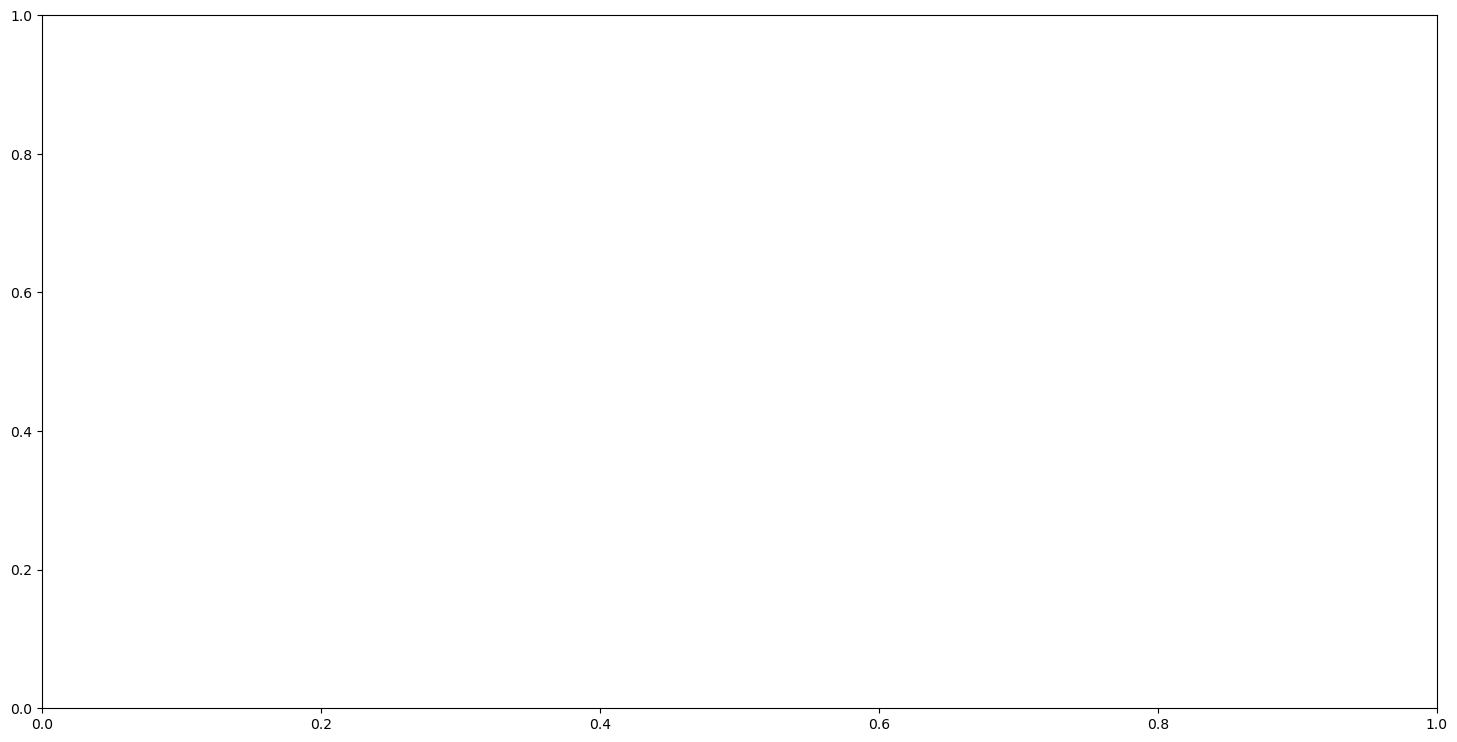

In [13]:
x_values = np.arange(1990.0,2022.0,1.0)
y_values = climate_change_new_1990['Climate Change Value'].to_numpy()
climate_graph = plt.figure()
climate_graph.set_figheight(9)
climate_graph.set_figwidth(18)
plt.plot(x_values, y_values, 'g-')
plt.title('Climate change value per year')
plt.xlabel('Year')
plt.ylabel('Climate change value')
plt.xlim(1990, 2022)
plt.grid(color='grey', linestyle='--', linewidth=1)
plt.plot(figsize=(20,20))

#liner regression
(climate_slope, climate_intercept, climate_rvalue, climate_pvalue, climate_stderr) = st.linregress(x_values, y_values)
climate_regress = x_values * climate_slope + climate_intercept
plt.annotate(f"y = {round(climate_slope,2)}x + {round(climate_intercept,2)}", xy=(2006,0.5), xycoords='data', color='brown')
plt.annotate(f"The r-squared value is {round(climate_rvalue**2,4)}", xy=(1995.3,1.3), xycoords='data', color='olive', )
plt.plot(x_values,climate_regress,"brown")

plt.show()

### Analysis

Over this 30 year period, we are able to see a slight increase in climate change with a slope of 0.03. The r-squared value is only 41% which allows for some confidence to say that the climate change value is trending upwards.

### Climate Change and its effect on Production and Export

The following code will compare climate change and its effect on production and export data

In [ ]:
gmr_export_data = pd.read_csv('Resources/GMR_Summary.csv')
gmr_export_data = gmr_export_data.drop(columns=['Opening Stocks', 'Imports', 'Total Supply', 'Food Use', 'Industrial Use', 'Feed Use', 'Closing stocks'])
gmr_export_data = gmr_export_data[::-1] # reordering to make the lowest year the first value

#climate_export_data = gmr_export_data.merge(climate_change_new_2017, how='outer', on='Year')
#climate_export_data
gmr_export_data.head()


,Year,Production,Total Use,Exports
6,2017-18,20.941,7.950000,13.900
5,2018-19,17.598,9.070000,9.000
4,2019-20,14.480,8.330000,9.139
3,2020-21,31.923,7.272000,23.816
2,2021-22,27.900,8.200763,21.000


Index(['Climate Change Value'], dtype='object')


Climate Change Value    float64
dtype: object

TypeError: ufunc 'divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

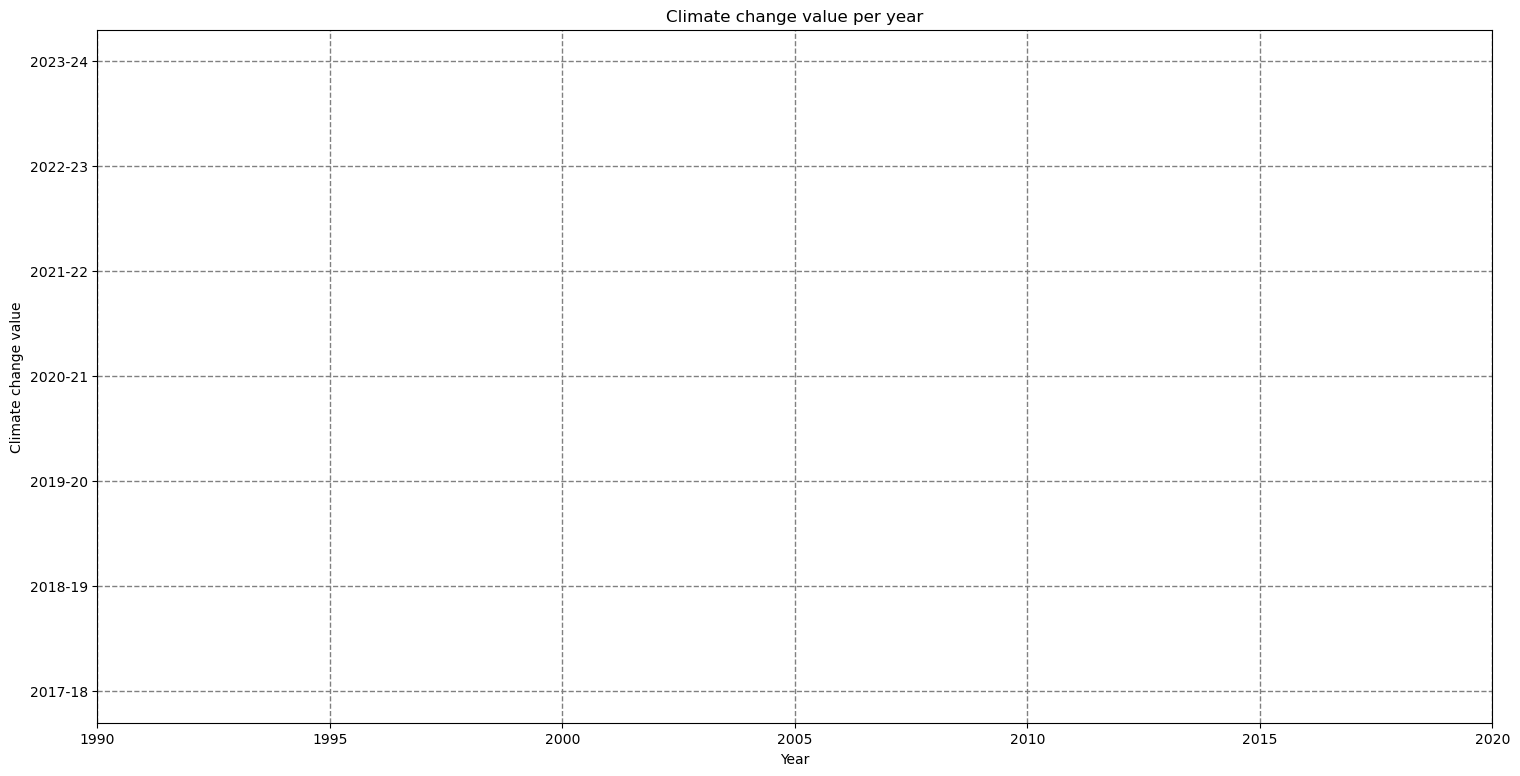

In [ ]:
x_values = np.arange(0,7,1)
y_values = climate_export_data['Year'].to_numpy()
climate_export_graph = plt.figure()
climate_export_graph.set_figheight(9)
climate_export_graph.set_figwidth(18)
plt.plot(x_values, y_values, 'g-')
plt.title('Climate change value per year')
plt.xlabel('Year')
plt.ylabel('Climate change value')
plt.xlim(1990, 2020)
plt.grid(color='grey', linestyle='--', linewidth=1)
plt.plot(figsize=(20,20))

#liner regression
(climate_slope, climate_intercept, climate_rvalue, climate_pvalue, climate_stderr) = st.linregress(x_values, y_values)
climate_regress = x_values * climate_slope + climate_intercept
plt.annotate(f"y = {round(climate_slope,2)}x + {round(climate_intercept,2)}", xy=(2006,0.5), xycoords='data', color='brown')
plt.annotate(f"The r-squared value is {round(climate_rvalue**2,4)}", xy=(1995.3,1.3), xycoords='data', color='olive', )
plt.plot(x_values,climate_regress,"brown")

plt.show()


### Temperature vs state

This code will show the temperature for each state per year with the temperature range for optimal plant growth highlighted

In [16]:
cairns_temp = pd.read_csv('Resources/Cairns_QL_BOM/Cairns_Annual_Mean_Max_Temp.csv')
coffin_bay_temp = pd.read_csv('Resources/CoffinBay_SA_BOM/Wanilla_Annual_Mean_Max_Temp.csv')
dubbo_temp = pd.read_csv('Resources/Dubbo_NSW_BOM/Dubbo_Anuual_Mean_Max_Temp.csv')
northam_temp = pd.read_csv('Resources/Northam_WA_BOM/Northam_Annual_Mean_Max_Temp.csv')
wangaratta_temp = pd.read_csv('Resources/Wangaratta_VIC_BOM/Wangaratta_Annual_Mean_Max_Temp.csv')

cairns_temp = cairns_temp[['Year', 'Annual']]
coffin_bay_temp = coffin_bay_temp[['Year', 'Annual']]
dubbo_temp = dubbo_temp[['Year', 'Annual']]
northam_temp = northam_temp[['Year', 'Annual']]
wangaratta_temp = wangaratta_temp[['Year', 'Annual']]

city_temp = cairns_temp
city_temp = city_temp.rename(columns={'Annual' : 'Cairns Average'})
city_temp = city_temp.merge(coffin_bay_temp.rename(columns={'Annual' : 'Coffin Bay Average'}), how='left', on='Year')
city_temp = city_temp.merge(dubbo_temp.rename(columns={"Annual" : 'Dubbo Average'}), how='left', on='Year')
city_temp = city_temp.merge(northam_temp.rename(columns={'Annual' : "Northam Average"}), how='left', on='Year')
city_temp = city_temp.merge(wangaratta_temp.rename(columns={'Annual' : "Wangaratta Average"}), how='left', on='Year')
city_temp.dtypes

Year                    int64
Cairns Average        float64
Coffin Bay Average    float64
Dubbo Average         float64
Northam Average       float64
Wangaratta Average    float64
dtype: object

In [17]:
x_values = np.arange(0,11,1)
y_values = city_temp.loc['2013']
climate_export_graph = plt.figure()
climate_export_graph.set_figheight(9)
climate_export_graph.set_figwidth(18)
plt.plot(x_values, y_values, 'g-')
plt.title('Climate change value per year')
plt.xlabel('Year')
plt.ylabel('Climate change value')
plt.xlim(1990, 2020)
plt.grid(color='grey', linestyle='--', linewidth=1)
plt.plot(figsize=(20,20))

#liner regression
(climate_slope, climate_intercept, climate_rvalue, climate_pvalue, climate_stderr) = st.linregress(x_values, y_values)
climate_regress = x_values * climate_slope + climate_intercept
plt.annotate(f"y = {round(climate_slope,2)}x + {round(climate_intercept,2)}", xy=(2006,0.5), xycoords='data', color='brown')
plt.annotate(f"The r-squared value is {round(climate_rvalue**2,4)}", xy=(1995.3,1.3), xycoords='data', color='olive', )
plt.plot(x_values,climate_regress,"brown")

plt.show()


KeyError: '2013'

Temperature against climate change

In [18]:
climate_change_new_1990['Year'] = climate_change_new_1990['Year'].astype(float)
climate_2013 = climate_change_new_1990.loc[climate_change_new_1990["Year"] > 2012]

In [34]:
climate_2013['Year'] = climate_2013['Year'].astype(int)

cc_weather = pd.merge(climate_2013, city_temp, how='left', on='Year')
qld_cc_weather = cc_weather.dropna()

C:\Users\bosb0\AppData\Local\Temp\ipykernel_25468\2429958632.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climate_2013['Year'] = climate_2013['Year'].astype(int)


C:\Users\bosb0\AppData\Local\Temp\ipykernel_25468\3196308751.py:9: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axs[0,0].scatter(cc_weather['Climate Change Value'], cc_weather['Dubbo Average'], c='blue', cmap="viridis")
C:\Users\bosb0\AppData\Local\Temp\ipykernel_25468\3196308751.py:27: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axs[0,1].scatter(cc_weather['Climate Change Value'], cc_weather['Wangaratta Average'], c='blue', cmap="viridis")
C:\Users\bosb0\AppData\Local\Temp\ipykernel_25468\3196308751.py:45: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axs[1,0].scatter(qld_cc_weather['Climate Change Value'], qld_cc_weather['Cairns Average'], c='blue', cmap="viridis")
C:\Users\bosb0\AppData\Local\Temp\ipykernel_25468\3196308751.py:63: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axs[1,1].scatter(cc_wea

ValueError: too many values to unpack (expected 4)

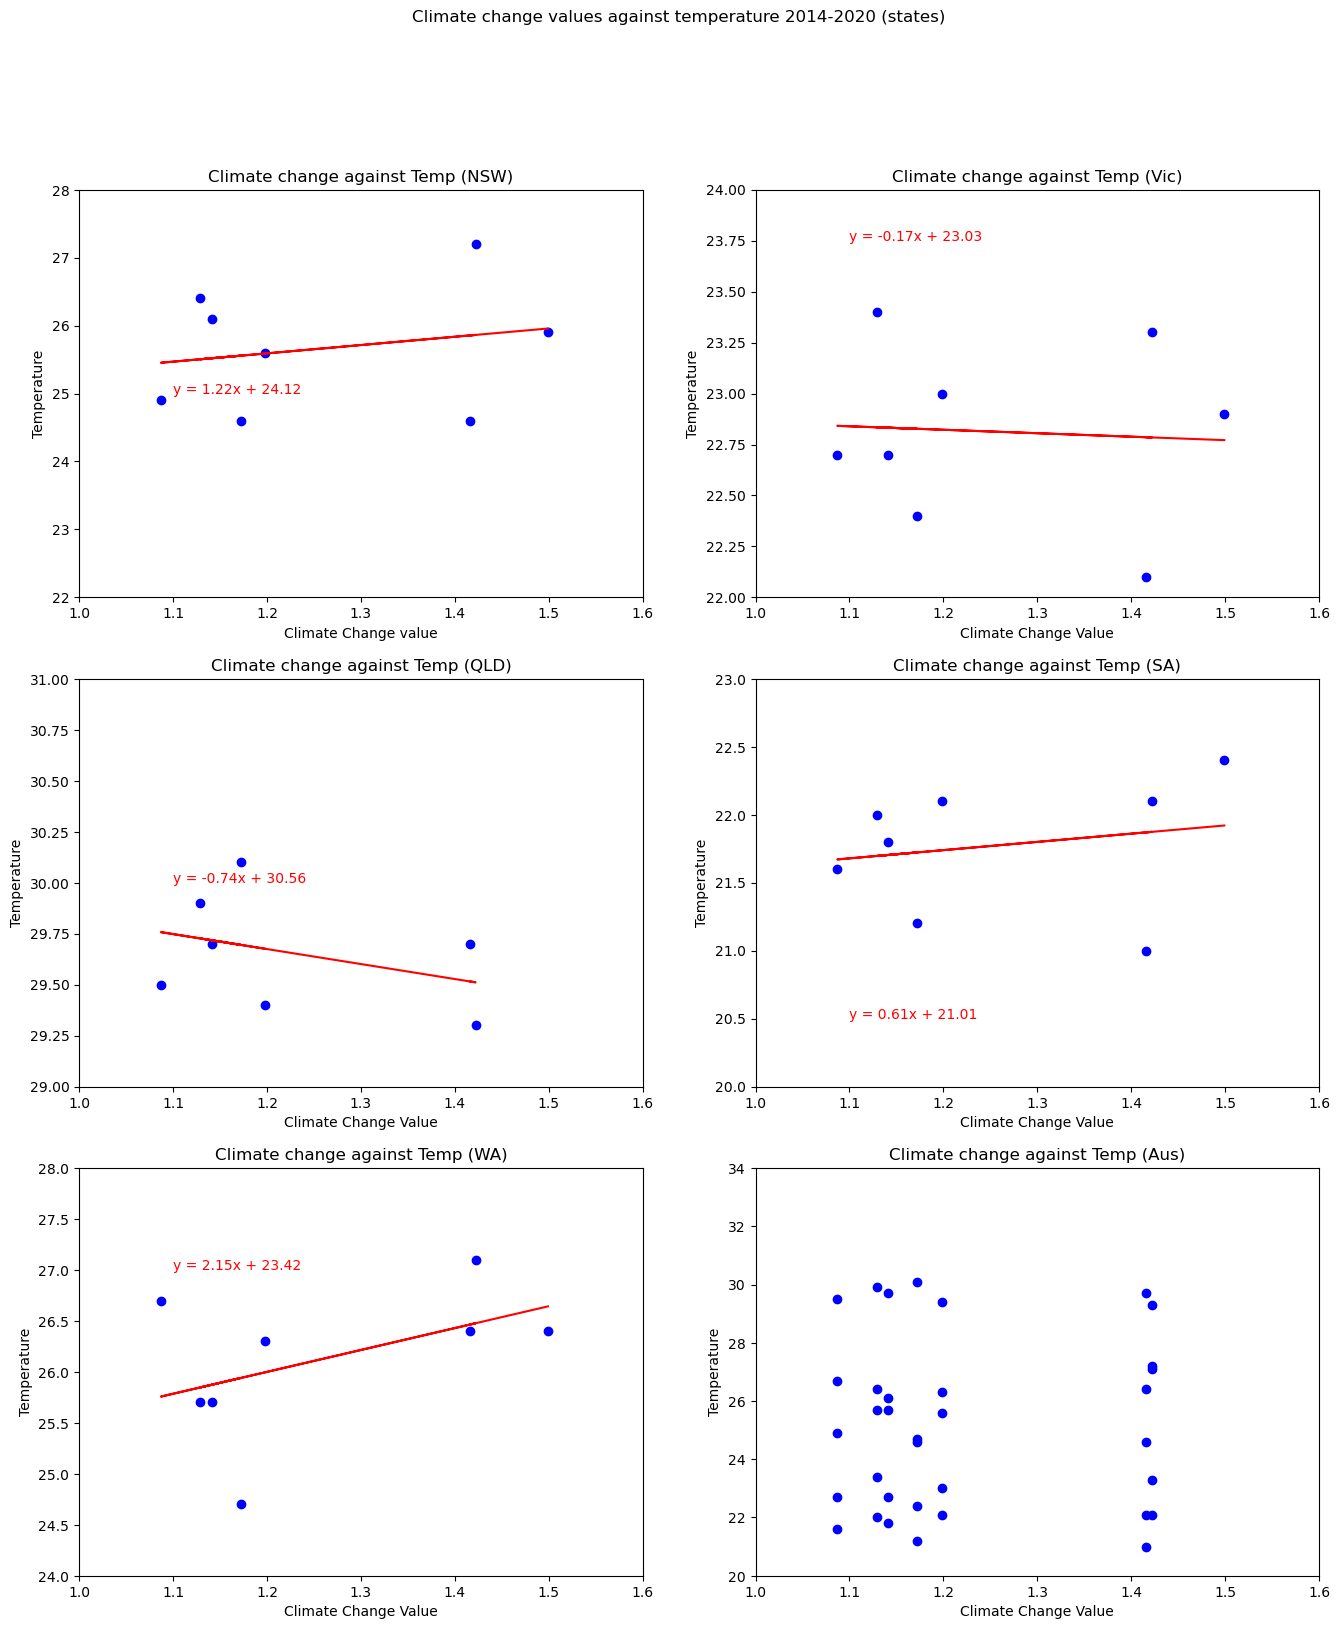

In [59]:

# Creating a multi plot with three rows and two columns
fig, axs = plt.subplots(3, 2)
fig.suptitle('Climate change values against temperature 2014-2020 (states)')
fig.set_figheight(18)
fig.set_figwidth(16)

# NSW graph
# Creating a scatter graph with the year as the x value and yield as the y value
axs[0,0].scatter(cc_weather['Climate Change Value'], cc_weather['Dubbo Average'], c='blue', cmap="viridis")
axs[0,0].set_title('Climate change against Temp (NSW)')
axs[0,0].set_ylabel('Temperature')
axs[0,0].set_xlabel('Climate Change value')
axs[0,0].set_xlim(1, 1.6)
axs[0,0].set_ylim(22, 28)

# NSW linear regression
nsw_x_values = cc_weather['Climate Change Value']
nsw_y_values = cc_weather['Dubbo Average']
(nsw_slope, nsw_intercept, nsw_rvalue, nsw_pvalue, nsw_stderr) = st.linregress(nsw_x_values, nsw_y_values)
nsw_regress = nsw_x_values * nsw_slope + nsw_intercept
axs[0,0].annotate(f"y = {round(nsw_slope,2)}x + {round(nsw_intercept,2)}", xy=(1.1,25), xycoords='data', color='red')
axs[0,0].plot(nsw_x_values,nsw_regress,"r-")

#------

# VIC graph
axs[0,1].scatter(cc_weather['Climate Change Value'], cc_weather['Wangaratta Average'], c='blue', cmap="viridis")
axs[0,1].set_title('Climate change against Temp (Vic)')
axs[0,1].set_ylabel('Temperature')
axs[0,1].set_xlabel('Climate Change Value')
axs[0,1].set_xlim(1, 1.6)
axs[0,1].set_ylim(22, 24)

# VIC linear regression
vic_x_values = cc_weather['Climate Change Value']
vic_y_values = cc_weather['Wangaratta Average']
(vic_slope, vic_intercept, vic_rvalue, vic_pvalue, vic_stderr) = st.linregress(vic_x_values, vic_y_values)
vic_regress = vic_x_values * vic_slope + vic_intercept
axs[0,1].annotate(f"y = {round(vic_slope,2)}x + {round(vic_intercept,2)}", xy=(1.1,23.75), xycoords='data', color='red')
axs[0,1].plot(vic_x_values,vic_regress,"r-")


#------
# QLD graph
axs[1,0].scatter(qld_cc_weather['Climate Change Value'], qld_cc_weather['Cairns Average'], c='blue', cmap="viridis")
axs[1,0].set_title('Climate change against Temp (QLD)')
axs[1,0].set_ylabel('Temperature')
axs[1,0].set_xlabel('Climate Change Value')
axs[1,0].set_xlim(1, 1.6)
axs[1,0].set_ylim(29, 31)

# QLD linear regression (uncomment the section below once fixed)
qld_x_values = qld_cc_weather['Climate Change Value']
qld_y_values = qld_cc_weather['Cairns Average']
(qld_slope, qld_intercept, qld_rvalue, qld_pvalue, qld_stderr) = st.linregress(qld_x_values, qld_y_values)
qld_regress = qld_x_values * qld_slope + qld_intercept
axs[1,0].annotate(f"y = {round(qld_slope,2)}x + {round(qld_intercept,2)}", xy=(1.1,30), xycoords='data', color='red')
axs[1,0].plot(qld_x_values,qld_regress,"r-")


#------
# SA graph
axs[1,1].scatter(cc_weather['Climate Change Value'], cc_weather['Coffin Bay Average'], c='blue', cmap="viridis")
axs[1,1].set_title('Climate change against Temp (SA)')
axs[1,1].set_ylabel('Temperature')
axs[1,1].set_xlabel('Climate Change Value')
axs[1,1].set_xlim(1, 1.6)
axs[1,1].set_ylim(20, 23)

# SA linear regression (uncomment the section below once fixed)
sa_x_values = cc_weather['Climate Change Value']
sa_y_values = cc_weather['Coffin Bay Average']
(sa_slope, sa_intercept, sa_rvalue, sa_pvalue, sa_stderr) = st.linregress(sa_x_values, sa_y_values)
sa_regress = sa_x_values * sa_slope + sa_intercept
axs[1,1].annotate(f"y = {round(sa_slope,2)}x + {round(sa_intercept,2)}", xy=(1.1,20.5), xycoords='data', color='red')
axs[1,1].plot(sa_x_values,sa_regress,"r-")

#------

# WA graph
axs[2,0].scatter(cc_weather['Climate Change Value'], cc_weather['Northam Average'], c='blue', cmap="viridis")
axs[2,0].set_title('Climate change against Temp (WA)')
axs[2,0].set_ylabel('Temperature')
axs[2,0].set_xlabel('Climate Change Value')
axs[2,0].set_xlim(1, 1.6)
axs[2,0].set_ylim(24, 28)

# linear regression (uncomment the section below once fixed)
wa_x_values = cc_weather['Climate Change Value']
wa_y_values = cc_weather['Northam Average']
(wa_slope, wa_intercept, wa_rvalue, wa_pvalue, wa_stderr) = st.linregress(wa_x_values, wa_y_values)
wa_regress = wa_x_values * wa_slope + wa_intercept
axs[2,0].annotate(f"y = {round(wa_slope,2)}x + {round(wa_intercept,2)}", xy=(1.1,27), xycoords='data', color='red')
axs[2,0].plot(wa_x_values,wa_regress,"r-")

#-------
#Australia
axs[2,1].scatter([qld_cc_weather['Climate Change Value'],qld_cc_weather['Climate Change Value'],qld_cc_weather['Climate Change Value'],qld_cc_weather['Climate Change Value'],qld_cc_weather['Climate Change Value']], 
                 [qld_cc_weather['Dubbo Average'], qld_cc_weather['Wangaratta Average'], qld_cc_weather['Coffin Bay Average'], qld_cc_weather['Cairns Average'], qld_cc_weather['Northam Average']], c='blue', cmap="viridis")
axs[2,1].set_title('Climate change against Temp (Aus)')
axs[2,1].set_ylabel('Temperature')
axs[2,1].set_xlabel('Climate Change Value')
axs[2,1].set_xlim(1, 1.6)
axs[2,1].set_ylim(20, 34)

aus_x_values = [qld_cc_weather['Climate Change Value'],qld_cc_weather['Climate Change Value'],qld_cc_weather['Climate Change Value'],qld_cc_weather['Climate Change Value'],qld_cc_weather['Climate Change Value']]
aus_y_values = [qld_cc_weather['Dubbo Average'], qld_cc_weather['Wangaratta Average'], qld_cc_weather['Coffin Bay Average'], qld_cc_weather['Cairns Average'], qld_cc_weather['Northam Average']]
(aus_slope, aus_intercept, aus_rvalue, aus_pvalue, aus_stderr) = st.linregress(aus_x_values, aus_y_values)
aus_regress = aus_x_values * aus_slope + aus_intercept
axs[2,1].annotate(f"y = {round(wa_slope,2)}x + {round(wa_intercept,2)}", xy=(1.1,27), xycoords='data', color='red')
axs[2,1].plot(year_range,aus_regress,"r-")

Climate Change against Rainfall

In [87]:
climate_2014 = climate_2013.loc[climate_2013['Year'] > 2013]
cc_rain = pd.merge(climate_2014, rainfall_df, how='left', on='Year')
cc_rain

,Climate Change Value,Year,NSW Annual Rainfall,QL Annual Rainfall,VIC Annual Rainfall,SA Annual Rainfall,WA Annual Rainfall
0,1.198,2014,571.6,1741.0,598.0,380.2,406.80
1,1.087,2015,651.6,1475.5,689.4,301.2,324.30
2,1.172,2016,916.4,1210.0,780.8,497.4,430.20
3,1.141,2017,465.4,1757.6,593.0,378.6,536.10
4,1.129,2018,311.6,3158.8,689.0,293.6,405.15
5,1.422,2019,211.2,2044.2,343.4,261.8,274.20
6,1.416,2020,567.8,1778.6,549.6,485.0,286.60


C:\Users\bosb0\AppData\Local\Temp\ipykernel_25468\3742221405.py:9: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axs[0,0].scatter(cc_rain['Climate Change Value'], cc_rain['NSW Annual Rainfall'], c='blue', cmap="viridis")
C:\Users\bosb0\AppData\Local\Temp\ipykernel_25468\3742221405.py:27: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axs[0,1].scatter(cc_rain['Climate Change Value'], cc_rain['VIC Annual Rainfall'], c='blue', cmap="viridis")
C:\Users\bosb0\AppData\Local\Temp\ipykernel_25468\3742221405.py:45: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axs[1,0].scatter(cc_rain['Climate Change Value'], cc_rain['QL Annual Rainfall'], c='blue', cmap="viridis")
C:\Users\bosb0\AppData\Local\Temp\ipykernel_25468\3742221405.py:63: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axs[1,1].scatter(cc_rain['Climate Chan

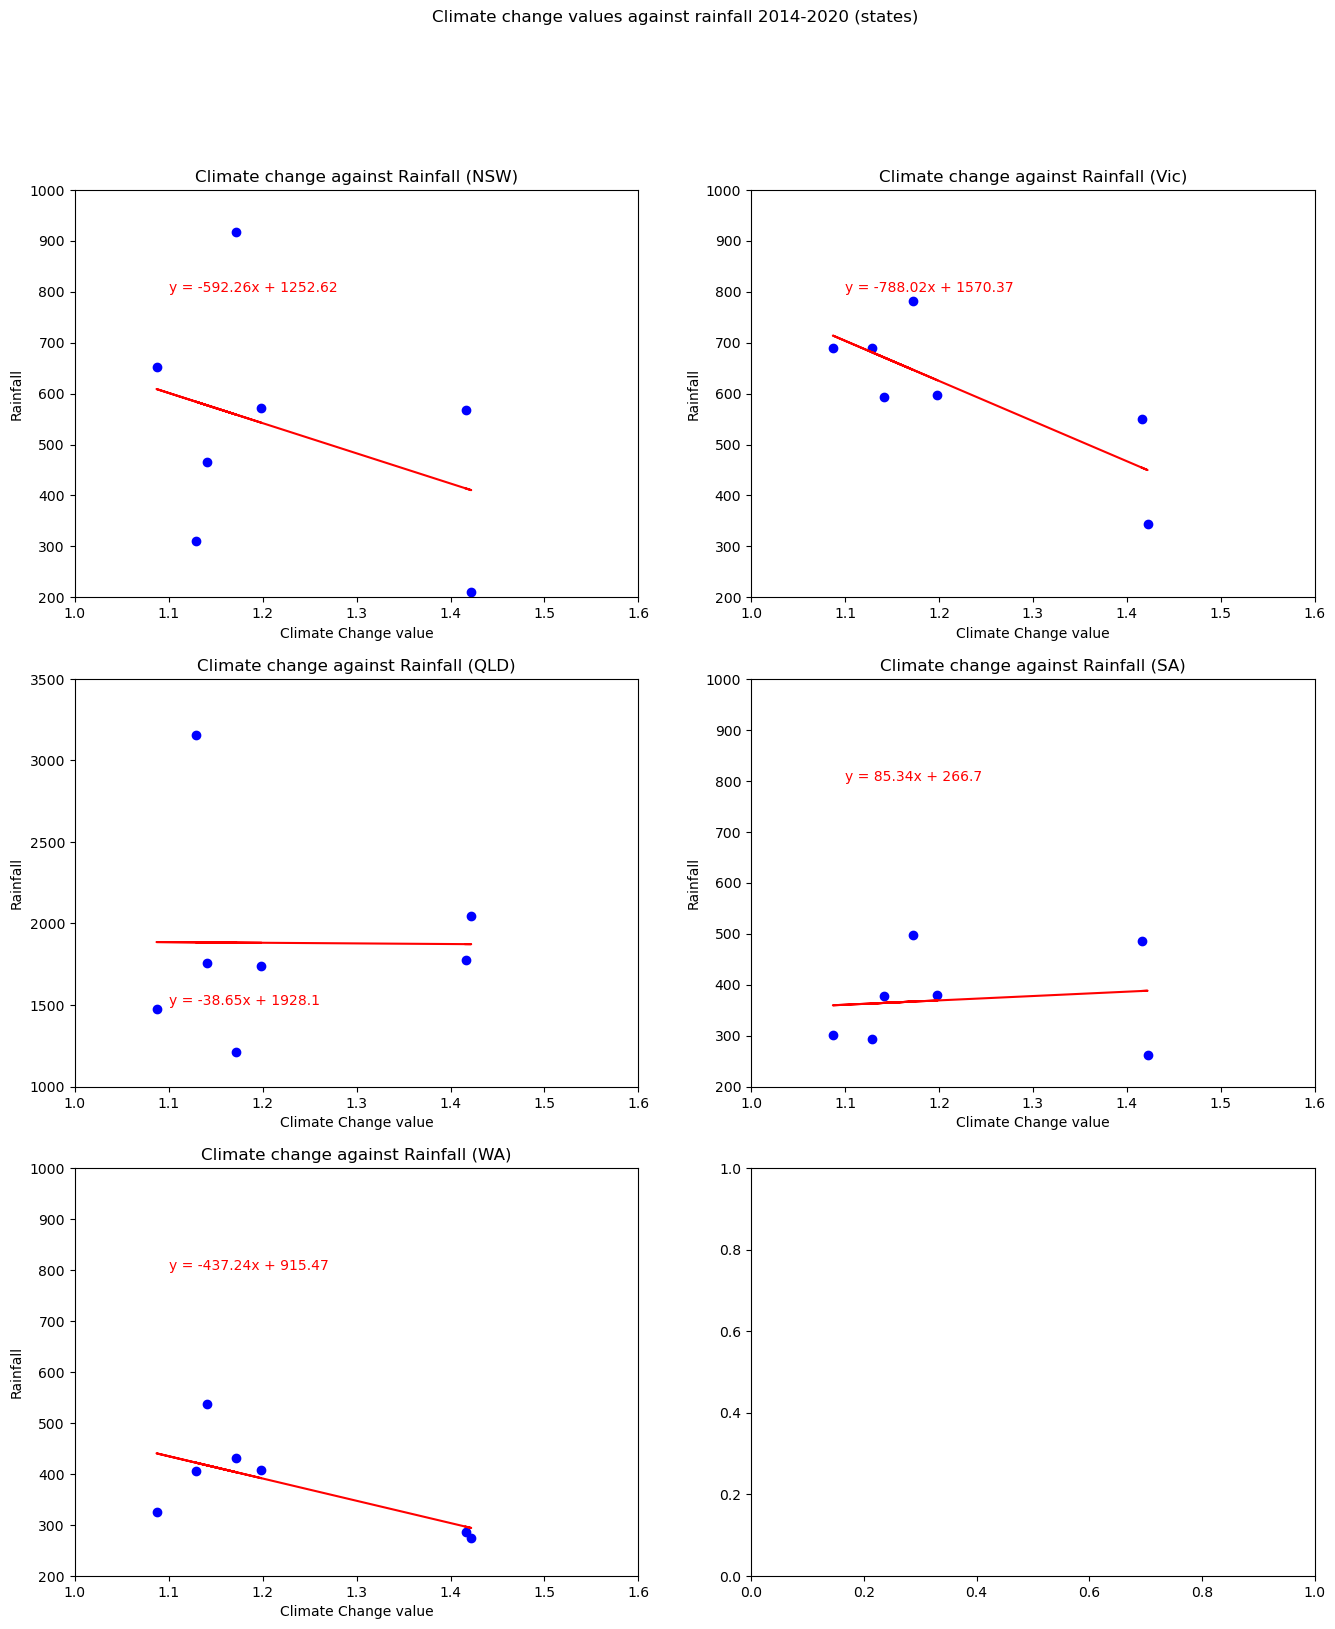

In [95]:
# Creating a multi plot with three rows and two columns
fig, axs = plt.subplots(3, 2)
fig.suptitle('Climate change values against rainfall 2014-2020 (states)')
fig.set_figheight(18)
fig.set_figwidth(16)

# NSW graph
# Creating a scatter graph with the year as the x value and yield as the y value
axs[0,0].scatter(cc_rain['Climate Change Value'], cc_rain['NSW Annual Rainfall'], c='blue', cmap="viridis")
axs[0,0].set_title('Climate change against Rainfall (NSW)')
axs[0,0].set_ylabel('Rainfall')
axs[0,0].set_xlabel('Climate Change value')
axs[0,0].set_xlim(1, 1.6)
axs[0,0].set_ylim(200, 1000)

# NSW linear regression
nsw_x_values = cc_rain['Climate Change Value']
nsw_y_values = cc_rain['NSW Annual Rainfall']
(nsw_slope, nsw_intercept, nsw_rvalue, nsw_pvalue, nsw_stderr) = st.linregress(nsw_x_values, nsw_y_values)
nsw_regress = nsw_x_values * nsw_slope + nsw_intercept
axs[0,0].annotate(f"y = {round(nsw_slope,2)}x + {round(nsw_intercept,2)}", xy=(1.1,800), xycoords='data', color='red')
axs[0,0].plot(nsw_x_values,nsw_regress,"r-")

#------

# VIC graph
axs[0,1].scatter(cc_rain['Climate Change Value'], cc_rain['VIC Annual Rainfall'], c='blue', cmap="viridis")
axs[0,1].set_title('Climate change against Rainfall (Vic)')
axs[0,1].set_ylabel('Rainfall')
axs[0,1].set_xlabel('Climate Change value')
axs[0,1].set_xlim(1, 1.6)
axs[0,1].set_ylim(200, 1000)

# VIC linear regression
vic_x_values = cc_rain['Climate Change Value']
vic_y_values = cc_rain['VIC Annual Rainfall']
(vic_slope, vic_intercept, vic_rvalue, vic_pvalue, vic_stderr) = st.linregress(vic_x_values, vic_y_values)
vic_regress = vic_x_values * vic_slope + vic_intercept
axs[0,1].annotate(f"y = {round(vic_slope,2)}x + {round(vic_intercept,2)}", xy=(1.1,800), xycoords='data', color='red')
axs[0,1].plot(vic_x_values,vic_regress,"r-")


#------
# QLD graph
axs[1,0].scatter(cc_rain['Climate Change Value'], cc_rain['QL Annual Rainfall'], c='blue', cmap="viridis")
axs[1,0].set_title('Climate change against Rainfall (QLD)')
axs[1,0].set_ylabel('Rainfall')
axs[1,0].set_xlabel('Climate Change value')
axs[1,0].set_xlim(1, 1.6)
axs[1,0].set_ylim(1000, 3500)

# QLD linear regression (uncomment the section below once fixed)
qld_x_values = cc_rain['Climate Change Value']
qld_y_values = cc_rain['QL Annual Rainfall']
(qld_slope, qld_intercept, qld_rvalue, qld_pvalue, qld_stderr) = st.linregress(qld_x_values, qld_y_values)
qld_regress = qld_x_values * qld_slope + qld_intercept
axs[1,0].annotate(f"y = {round(qld_slope,2)}x + {round(qld_intercept,2)}", xy=(1.1,1500), xycoords='data', color='red')
axs[1,0].plot(qld_x_values,qld_regress,"r-")


#------
# SA graph
axs[1,1].scatter(cc_rain['Climate Change Value'], cc_rain['SA Annual Rainfall'], c='blue', cmap="viridis")
axs[1,1].set_title('Climate change against Rainfall (SA)')
axs[1,1].set_ylabel('Rainfall')
axs[1,1].set_xlabel('Climate Change value')
axs[1,1].set_xlim(1, 1.6)
axs[1,1].set_ylim(200, 1000)

# SA linear regression (uncomment the section below once fixed)
sa_x_values = cc_rain['Climate Change Value']
sa_y_values = cc_rain['SA Annual Rainfall']
(sa_slope, sa_intercept, sa_rvalue, sa_pvalue, sa_stderr) = st.linregress(sa_x_values, sa_y_values)
sa_regress = sa_x_values * sa_slope + sa_intercept
axs[1,1].annotate(f"y = {round(sa_slope,2)}x + {round(sa_intercept,2)}", xy=(1.1,800), xycoords='data', color='red')
axs[1,1].plot(sa_x_values,sa_regress,"r-")

#------

# WA graph
axs[2,0].scatter(cc_rain['Climate Change Value'], cc_rain['WA Annual Rainfall'], c='blue', cmap="viridis")
axs[2,0].set_title('Climate change against Rainfall (WA)')
axs[2,0].set_ylabel('Rainfall')
axs[2,0].set_xlabel('Climate Change value')
axs[2,0].set_xlim(1, 1.6)
axs[2,0].set_ylim(200, 1000)

# WA regression
wa_x_values = cc_rain['Climate Change Value']
wa_y_values = cc_rain['WA Annual Rainfall']
(wa_slope, wa_intercept, wa_rvalue, wa_pvalue, wa_stderr) = st.linregress(wa_x_values, wa_y_values)
wa_regress = wa_x_values * wa_slope + wa_intercept
axs[2,0].annotate(f"y = {round(wa_slope,2)}x + {round(wa_intercept,2)}", xy=(1.1,800), xycoords='data', color='red')
axs[2,0].plot(wa_x_values,wa_regress,"r-")